In [42]:
import collections
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import datagen

In [2]:
data = datagen.load_dataset(None, Path.cwd() / "data" / "dicts.pkl")


3

In [10]:
all_data = sum(data.values(), [])

In [28]:
def get_all_nodes(root: datagen.Node):
    node_list = [root]
    children_nodes = root.get_children()
    if children_nodes:
        child_nodes_lists = [get_all_nodes(x) for x in children_nodes]
        for child_nodes_list in child_nodes_lists:
            node_list.extend(child_nodes_list)
    return node_list
    

all_nodes = []
for node in all_data:
    all_nodes += get_all_nodes(node)

In [29]:
top = max(tqdm(all_nodes), key=lambda x: len(str(x.get_value())))

100%|██████████| 4325278/4325278 [00:03<00:00, 1390471.75it/s]


In [48]:
lengths = [len(str(x.get_value())) for x in all_nodes]
lengths.sort()
l = np.array(lengths)

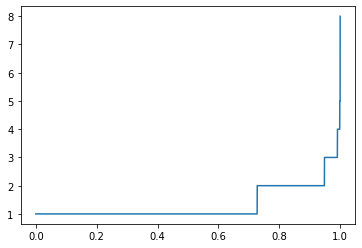

In [47]:
plt.plot(np.linspace(0, 1, len(l)), l)

In [58]:
[(i, f"{np.mean(l <= i):0.3%}") for i in range(9)]

[(0, '0.000%'),
 (1, '72.727%'),
 (2, '94.821%'),
 (3, '99.082%'),
 (4, '99.849%'),
 (5, '99.982%'),
 (6, '99.999%'),
 (7, '100.000%'),
 (8, '100.000%')]

In [57]:
def get_max_equals(root: datagen.Node):
    """
    If a node has children then it has an equal sign
    """
    qty = 0
    children_nodes = root.get_children()
    if children_nodes:
        qty += 1
        qty += sum([get_max_equals(x) for x in children_nodes])
    return qty

print(sorted(collections.Counter(get_max_equals(x) for x in all_data).items(), key=lambda x: x[1], reverse=True))
    

[(3, 187497), (7, 175731), (6, 23252), (2, 12504), (5, 997), (1, 300), (4, 19)]


In [65]:
longuest_generation = max(all_data, key=lambda x: len(str(x.get_oracle_str()[0])))

In [73]:
lengths = [len(x.get_oracle_str()[0]) for x in tqdm(all_data)]
oracle_str_lengths = np.array(lengths)
print("sorting")
oracle_str_lengths.sort()


100%|██████████| 400300/400300 [00:00<00:00, 1279441.13it/s]

sorting


88

In [77]:
[(i, f"{np.mean(oracle_str_lengths <= x):0.3%}") for i, x in enumerate(tqdm(range(88)))]

100%|██████████| 88/88 [00:00<00:00, 3002.58it/s]


[(0, '0.000%'),
 (1, '0.000%'),
 (2, '0.000%'),
 (3, '0.000%'),
 (4, '0.000%'),
 (5, '0.000%'),
 (6, '0.000%'),
 (7, '0.000%'),
 (8, '0.000%'),
 (9, '0.000%'),
 (10, '0.000%'),
 (11, '0.038%'),
 (12, '0.075%'),
 (13, '0.075%'),
 (14, '0.075%'),
 (15, '0.075%'),
 (16, '0.075%'),
 (17, '0.075%'),
 (18, '0.075%'),
 (19, '0.075%'),
 (20, '0.075%'),
 (21, '0.933%'),
 (22, '1.924%'),
 (23, '2.841%'),
 (24, '3.199%'),
 (25, '3.199%'),
 (26, '3.199%'),
 (27, '3.199%'),
 (28, '3.199%'),
 (29, '3.199%'),
 (30, '3.199%'),
 (31, '10.017%'),
 (32, '19.754%'),
 (33, '34.756%'),
 (34, '45.152%'),
 (35, '49.345%'),
 (36, '50.038%'),
 (37, '50.038%'),
 (38, '50.038%'),
 (39, '50.038%'),
 (40, '50.038%'),
 (41, '50.038%'),
 (42, '50.038%'),
 (43, '50.039%'),
 (44, '50.041%'),
 (45, '50.042%'),
 (46, '50.042%'),
 (47, '50.042%'),
 (48, '50.042%'),
 (49, '50.042%'),
 (50, '50.042%'),
 (51, '50.054%'),
 (52, '50.075%'),
 (53, '50.102%'),
 (54, '50.153%'),
 (55, '50.204%'),
 (56, '50.243%'),
 (57, '50.268%'